# Social Media Analytics
## School of Information, University of Michigan

## Week 4: Social Media Text
 
- Text sentiment analysis and topic modeling in social media

## Assignment Overview
### The objective  of this assignment is to:

- Compute the topics discussed in a social media corpus over time
- Compute sentiment in a social media corpus over time

### The total score of this assignment will be 100 points consisting of:

- `clean_tokenize_text` function: 5 points
- interpretation of why custom stop words are needed: 5 points
- `append_bigrams` function: 10 points
- `find_topics` function: 10 points
- `calculate_avg_coherence` function: 10 points
- `plot_coherences_topics` function: 10 points
- interpretation for measuring coherence: 5 points
- `plot_topics_per_year` function: 10 points
- observations about topics over time: 5 points
- `plot_most_popular_topics` function: 10 points
- observations about the most popular topics: 5 points
- `plot_sentiment_over_time` function: 10 points
- observations about tweet sentiment: 5 points

## Instructions
In this assignment, you will use the provided tweet corpus to compute and plot metrics based on the text of tweets. You will also create visualizations and interpret the data. 

### Resources:

- [Tweepy API documentation](https://tweepy.readthedocs.io/en/latest/) 
- [Trump tweet corpus](https://www.thetrumparchive.com/) 
- [Gensim API documentation](https://radimrehurek.com/gensim/apiref.html)
- [VADER documentation](https://github.com/cjhutto/vaderSentiment)
- [Seaborn documentation](https://seaborn.pydata.org/)


## Create a function to clean and tokenize the text
*We suggest following the instructions below as closely as possible to match the sample output, though we also note that it is possible to vary slightly from the sample provided and still pass the autograder and recieve full credit for the charts below.*

<img src="assets/clean_tokenize_text_example.png"  style="width: 500px;"/>

In [1]:
import pandas as pd
from gensim.parsing.preprocessing import preprocess_string, STOPWORDS 

CUSTOM_STOP_WORDS = ['www','tinyurl','com', 'https', 'http','donald','trump','realdonaldtrump', '&amp', 'rt', 'bit', 'ly', 'bitly']

def clean_tokenize_text(tweet_df):
    """
    5 points 
    Create a function that cleans and tokenizes the text in the column 'text' 
        and saves it in a column called 'tokens'.    
    In your output dataframe, the column 'tokens' should contain a list of strings.
    
    (1) Use gensim's preprocess.preprocess_string function to do our basic preprocessing of the 'text'; 
            No special methods need be selected, nor additional gensim library items imported, the default works.
    (2) Next, remove default gensim STOPWORDS and our own list of CUSTOM_STOP_WORDS above. 
            This will require creating your own postprocessing operation(s).  
        Why do we need our own postprocessing operation to remove STOPWORDS if these words are a default set in gensim?? 
        The reason is preprocess_string function will remove a STOPWORD like 'go' if it appears as a full word in the text, but will return 'go' as 
        a stem of a word like 'going', so you'll need to remove the STOPWORDS (and CUSTOM_STOP_WORDS) in a postprocessing step.
    
    If you implement the above instructions correctly, these are the changes we'll see performed on the original 'text':
        - remove tags
        - strip punctuation
        - remove multiple whitespace
        - remove numeric characters
        - tokenize words
        - return a lower-case stemmed version of the text
        - remove common STOPWORDS (imported from gensim's Stone, Denis, Kwantes (2010) dataset)
        - remove CUSTOM_STOP_WORDS, defined above
 
    """
    tweet_df['text'] = tweet_df['text'].astype(str)
    tweet_df["tokens"] = tweet_df["text"].apply(preprocess_string)
    ALL_STOPWORDS = STOPWORDS.union(CUSTOM_STOP_WORDS) # union gensim stopwords with custom stopwords
    tweet_df["tokens"] = tweet_df["tokens"].apply(lambda l: [s for s in l if s not in ALL_STOPWORDS])
    return tweet_df
    # YOUR CODE HERE
    #raise NotImplementedError()

tweets_tokens = clean_tokenize_text(pd.read_pickle('assets/tweets.pkl'))
tweets_tokens.head()

,text,created_at,favorite_count,tokens
56,"WIshing everyone a happy, healthy and prospero...",2010-12-30 21:42:01+00:00,42,"[wish, happi, healthi, prosper, new, year]"
57,Wishing everyone a very Happy Holiday season!,2010-12-23 16:26:18+00:00,55,"[wish, happi, holidai, season]"
58,"Don't forget to watch Larry King tonight, CNN ...",2010-12-16 14:30:23+00:00,20,"[forget, watch, larri, king, tonight, cnn, tel..."
59,I'll be appearing on Larry King Live for his f...,2010-12-14 20:55:30+00:00,37,"[appear, larri, king, live, final, thursdai, n..."
60,"...Trump International Hotel Las Vegas, and Tr...",2010-12-13 16:42:27+00:00,6,"[intern, hotel, la, vega, intern, hotel, tower..."


In [2]:


tweets_tokens = clean_tokenize_text(pd.read_pickle('assets/tweets.pkl'))

assert 'tokens' in tweets_tokens.columns, "clean_tokenize_text, the column tokens should exist"
assert len(tweets_tokens.iloc[0].tokens) > 0, "clean_tokenize_text, there should be valid tokens on the first tweet of the df"

### Why CUSTOM_STOP_WORDS?
Why isn't the standard STOPWORDS list sufficient for our purposes? (Hint: take a look at what's in it.)

The standard STOPWORDS list is not sufficient for our purposes because it does not include many words we don't want to have in the lists. For example, 'tinyurl' and 'https' aren't very important for our purposes or really any type of analysis in our case.  

## Create a function to append common bigrams to the tokens
*We suggest following the instructions below as closely as possible to match the sample output, though we'd also note it is possible to vary slightly from the sample provided and still pass the autograder and recieve full credit for the charts below.*

<img src="assets/append_bigrams_example.png"  style="width: 500px;"/>

In [3]:
#phrases = Phrases(tweets_tokens["tokens"], min_count=20).freeze()
# keep_bigrams = list(phrases.freeze().phrasegrams.keys())
# [x for x in phrases[tweets_tokens["tokens"]]]

In [4]:
from gensim.models.phrases import Phrases, Phraser

def append_bigrams(tweet_df):
    """
    10 points 
        Create a function that appends bigrams (sets of two adjacent words) for the column 'tokens'.
        
        We recommend using gensim's gensim.models.Phrases to detect the frequent bigrams, 
            and then "freezing" the model as a Phraser for better performance.
            
        Only do this for bigrams that appear together frequently in the corpus (20+ times).
        so that it makes sense to treat them as a single phrase. (min_count parameter)
            
        Join the bigrams using an underscore or "_" (delimiter parameter, also the default treatment); 
        e.g., the tokens ['machine','learning'] would yield ['machine','learning', 'machine_learning']

    NOTE: Don't remove duplicate strings. It's OK if the same bigram is included more than once.
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    phrases = Phrases(tweets_tokens["tokens"], min_count=20).freeze()
    tweet_df["tokens"] = tweet_df["tokens"].apply(lambda l: l + [x for x in phrases[l] if x not in l])
    return tweet_df

tweets_tokens = clean_tokenize_text(pd.read_pickle('assets/tweets.pkl'))
tweets_bigrams = append_bigrams(tweets_tokens)
tweets_bigrams['tokens'].head().values  #you can try lowering your min_count to see how the output would change!

array([list(['wish', 'happi', 'healthi', 'prosper', 'new', 'year']),
       list(['wish', 'happi', 'holidai', 'season']),
       list(['forget', 'watch', 'larri', 'king', 'tonight', 'cnn', 'televis', 'legend', 'great', 'friend', 'fantast', 'farewel']),
       list(['appear', 'larri', 'king', 'live', 'final', 'thursdai', 'night', 'cnn', 'larri', 'year']),
       list(['intern', 'hotel', 'la', 'vega', 'intern', 'hotel', 'tower', 'waikiki', 'beach', 'walk', 'tlworldsbest', 'roiresearch', 'intern_hotel', 'la_vega', 'intern_hotel'])],
      dtype=object)

In [5]:
assert True in tweets_bigrams['tokens'].str.join(' ').str.contains('_').values, 'append_bigrams, the tokens must contain bigrams'

## Create a function to create a topic model
*We suggest following the instructions below as closely as possible to match the sample output, though we'd also note it is possible to vary slightly from the sample provided and still pass the autograder and recieve full credit for the charts below.*

<img src="assets/find_topics_example.png"  style="width: 500px;"/>

In [6]:
tweets_bigrams["tokens"]

56              [wish, happi, healthi, prosper, new, year]
57                          [wish, happi, holidai, season]
58       [forget, watch, larri, king, tonight, cnn, tel...
59       [appear, larri, king, live, final, thursdai, n...
60       [intern, hotel, la, vega, intern, hotel, tower...
                               ...                        
32792    [donaldjtrumpjr, happi, new, year, newyear, fa...
32793    [erictrump, incred, year, entir, famili, beaut...
32794    [reinc, happi, new, year, god, bless, look, fo...
32795    [danscavino, behalf, potu, amp, teamtrump, hap...
32796    [american, happynewyear, amp, bless, look, for...
Name: tokens, Length: 32738, dtype: object

In [7]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

def find_topics(tokens, num_topics):
    """
    10 points
    
    tokens: an iterable each of whose items is a list of tokens
    num_topics: integer
    
    Use gensim's LDA Model to find num_topics and return the top_topics. You should use the 
    following parameters for the LDA Model:
    
        - chunksize=2000
        - passes=20
        - iterations=400
        - eval_every=None
        - random_state=42
        - alpha='auto'
        - eta='auto'
    """
    # use gensim's Dictionary to filter words that appear less than ten times in the corpus
    # or represent more than 60% of the corpus
    #dictionary = None # Your code here
    dct = Dictionary(list(tokens))
    dct.filter_extremes(no_below=10, no_above=0.6)
    # use the dictionary to create a bag of word representation of each document
    corpus = [dct.doc2bow(doc) for doc in list(tokens)] # Your code here 
    # create gensim's LDA model 
    lda_model = LdaModel(corpus=corpus,id2word=dct,num_topics=num_topics, chunksize=2000, passes=20, iterations=400, eval_every=None, random_state=42, alpha='auto', eta='auto')
    #lda_model = None # Your code here
    # YOUR CODE HERE
    #raise NotImplementedError()
    return lda_model.top_topics(corpus) 

#uncomment to test, and try increasing the number of topics to see how the output changes!  
#note that this function can take a minute or more to run per topic.
# The function can take a minute or more to run.
tweets_tokens = clean_tokenize_text(pd.read_pickle('assets/tweets.pkl'))
tweets_bigrams = append_bigrams(tweets_tokens)
find_topics(tweets_bigrams['tokens'].dropna(), num_topics=1)

[([(0.018911319, 'great'),
   (0.014611139, 'thank'),
   (0.013477541, 'amp'),
   (0.009236722, 'new'),
   (0.008199047, 'presid'),
   (0.0071967435, 'peopl'),
   (0.0068205995, 'america'),
   (0.0057880348, 'job'),
   (0.00545007, 'countri'),
   (0.0054379217, 'time'),
   (0.0053115194, 'vote'),
   (0.0052420287, 'big'),
   (0.0048769773, 'todai'),
   (0.0047739735, 'run'),
   (0.0046171215, 'look'),
   (0.0045986543, 'hillari'),
   (0.0045764465, 'like'),
   (0.004303873, 'need'),
   (0.004004413, 'year'),
   (0.003976629, 'watch')],
  -3.385286924694381)]

### Visualize coherence as the number of topics varies from 2 to 10
*Please note the below cell can take a while to run, and that it is possible to have slight differences with the sample output and still recieve full credit.*
<img src="assets/sample_plot_1.png" alt="coherence vs topics" style="width: 500px;"/>

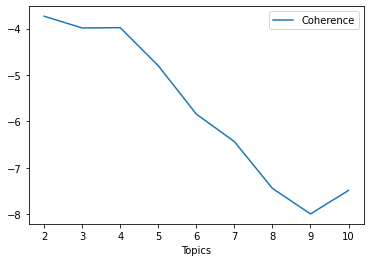

In [8]:
def calculate_avg_coherence(topics):
    """
    
    topics: a sequence of topics as extraced from an LDA model
    
    10 points
    Calculate the average coherence based on the top_topics returned by gensim's LDA model
    """
    avg_topic_coherence = sum([t[1] for t in topics])/len(topics)
    # YOUR CODE HERE
    #raise NotImplementedError()
    return avg_topic_coherence

def plot_coherences_topics(tokens):
    """
    10 points
    Create a plot as shown above of coherence for the topic models created with num_topics varying from 2 to 10
    """
    
    topic_list = []
    coherence_list = []
    topics_range = range(2, 11, 1)
    for i in topics_range:
        topics = find_topics(tokens, i)
        coherence = calculate_avg_coherence(topics)
        topic_list.append(i)
        coherence_list.append(coherence)

    model_results = {'Topics': topic_list,'Coherence': coherence_list}
    # YOUR CODE HERE
    #raise NotImplementedError()
    plt = pd.DataFrame(model_results).set_index('Topics').plot()

tweets_tokens = clean_tokenize_text(pd.read_pickle('assets/tweets.pkl'))
tweets_bigrams = append_bigrams(tweets_tokens)
tweets_bigrams = tweets_bigrams.dropna()
coherences_df = plot_coherences_topics(tweets_bigrams['tokens'])
coherences_df

### Explain how can you use this measure to establish the number of topics. (5 points)

You can use this measure to establish the number of topics through creating a range and calculating the average coherence based on the top_topics.  

### Visualize the topics across time by grouping tweets by year (2010 to 2017), and displaying the words for each topic.
*Please note that it is possible to have slight differences with the sample output and still recieve full credit.*
<img src="assets/sample_plot_2.png" alt="topics across time" style="width: 500px;"/>


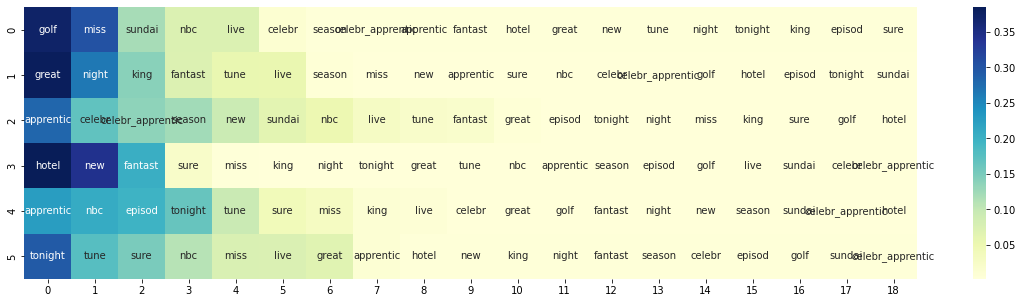

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def plot_topics_per_year(tweets_df, num_topics, num_words):
    """ 
    10 points
    Plot the topics of the tweets per each year following the example provided above.
    
    For this plot, we recommend using seaborn for the heatmap. Note that you must pass fmt='' to Seaborn for 
    string annotations. The colormap to match is "YlGnBu". See heatmap documentation for overlaying labels.
    
     - tweets_df is the dataframe that contains pre-processed tokens
     - num_topics is the number of topics to produce each year
     - num_words represents the number of words to include in each topic
    """
    # YOUR CODE HERE
    df_2010 = tweets_bigrams[pd.DatetimeIndex(tweets_bigrams['created_at']).year == 2010]
    data =find_topics(df_2010['tokens'].dropna(), num_topics=num_topics)
    topics = []
    for i in data:
        topics.append(i[0])
    df_values = pd.DataFrame([[y[0] for y in  x] for x in topics])
    df_topics = pd.DataFrame([[y[1] for y in  x] for x in topics])
    fig, ax = plt.subplots(figsize=(20,5))
    sns.heatmap(df_values,annot = df_topics, fmt='', cmap = "YlGnBu", ax=ax)
    #raise NotImplementedError()
    
tweets_tokens = clean_tokenize_text(pd.read_pickle('assets/tweets.pkl'))
tweets_bigrams = append_bigrams(tweets_tokens)
tweets_bigrams = tweets_bigrams.dropna()
plot_topics_per_year(tweets_bigrams, 6, 15)

### Explain what you see in the topics. For example, do the topics make sense? (5 points)

I see a bunch of topics in the 0.35-0.25 range that could definitely relate to each other somehow, but around after the 0.25-0.20 range, the topics do not really make sense and do not correlate with one another, and some topics are not actual words or are misspelled.

### Visualize topics for the most popular tweets (tweets with favorite count in the 75th percentile)
*Please note that it is possible to have slight differences with the sample output and still recieve full marks.*

<img src="assets/sample_plot_3.png" alt="topics across time" style="width: 500px;"/>


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_most_popular_topics(tweets_df, num_topics, num_words):
    """ 
    10 points
    Plot the topics of the most popular tweets (tweets with favorite count in the 75th percentile). The best
    approach is to restrict the set of tweets to those with high favorite count, and then compute topics.
    
    For this plot we recommend using seaborn for the heatmap. Note that you must pass fmt='' to Seaborn for 
    string annotations. The colormap to match is "YlGnBu". See heatmap documentation for overlaying labels.
    
     - tweets_df is the dataframe that contains pre-processed tokens
     - num_topics is the number of topics to produce each year
     - num_words represents the number of words to include in each topic
    """
    # YOUR CODE HERE
    # YOUR CODE HERE
    df_75 = tweets_bigrams[pd.DatetimeIndex(tweets_bigrams['created_at']).rename({'year':'tweet_percentage'})]
    data =find_topics(df_75['tokens'].dropna(), num_topics=num_topics)
    topics = []
    for i in data:
        topics.append(i[0])
    df_values = pd.DataFrame([[y[0] for y in  x] for x in topics])
    df_topics = pd.DataFrame([[y[1] for y in  x] for x in topics])
    fig, ax = plt.subplots(figsize=(20,5))
    sns.heatmap(df_values,annot = df_topics, fmt='', cmap = "YlGnBu", ax=ax)
    #raise NotImplementedError()
    #raise NotImplementedError()
    
tweets_tokens = clean_tokenize_text(pd.read_pickle('assets/tweets.pkl'))
tweets_bigrams = append_bigrams(tweets_tokens)
tweets_bigrams = tweets_bigrams.dropna()
plot_most_popular_topics(tweets_bigrams, 6, 15)

TypeError: DatetimeIndex.name must be a hashable type

### Explain what you see in the topics. How do they compare with the topics from all tweets? (5 points)

I see very few topics in the 0.09-0.08 range, but they could definitely relate to each other somehow, but around after the 0.07-0.06 range, the majority of the topics do not really make sense and do not correlate with one another, and some topics are not actual words or are misspelled.

### Visualize sentiment of the whole tweet corpus over time 
*Please note that it is possible to have slight differences with the sample output and still recieve full credit.*

<img src="assets/sample_plot_4.png" alt="sentiment over time" style="width: 500px;"/>


In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def plot_sentiment_over_time(tweets_df):
    """ 
    10 points
    Plot the sentiment of the whole tweet corpus over time as shown above
    Use vaderSentiment to obtain the compound sentiment per tweet.
    Aggregate the average sentiment per month in your plot
        
    - tweets_df: dataframe that contains created_at and text columns
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
tweets_df = pd.read_pickle('assets/tweets.pkl')
plot_sentiment_over_time(tweets_df)

### Write your observations about the sentiment (5 points)

YOUR ANSWER HERE